In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import json

In [84]:
df_bf = pd.read_json('C:/Users/ppaul/Desktop/bfro_reports.json', lines=True)  # use the lines parameter, read line by line

In [85]:
df_bf.head()

,YEAR,SEASON,STATE,COUNTY,LOCATION_DETAILS,OBSERVED,OTHER_WITNESSES,TIME_AND_CONDITIONS,REPORT_NUMBER,REPORT_CLASS,MONTH,DATE,NEAREST_TOWN,NEAREST_ROAD,ALSO_NOTICED,OTHER_STORIES,ENVIRONMENT,A_&_G_References
0,Early 1990's,Fall,Alaska,Valdez-Chitina-Whittier County,East side of Prince William Sound,Ed L. was salmon fishing with a companion in P...,On a commercial fishing boat at anchor at the ...,"Early Fall, in the early 1990's.",1261.0,Class A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Fall,New Jersey,Warren County,"the road is off us rt 80, i dont know the exit...",heh i kinda feel a little dumb that im reporti...,"my friend was asleep, and i was lying next to ...",lighting was from a camp fire that was dieing ...,438.0,Class B,September,2nd or 3rd,Allumuchy,not sure of the road,nothing,no but after the events stated i looked at you...,"good size river, steep hills, very rugged area...",NaN
3,2016,Summer,New Hampshire,Sullivan County,Close to Claremont down 120 not far from Kings...,I was on my way to Claremont from Lebanon on R...,Just myself,5am. Dawn. Clear weather,55269.0,Class A,June,7,Claremont,Rte 120,NaN,NaN,swamp with forest behind it. There was a large...,NaN
4,2018,Spring,Nebraska,Thurston County,Latitude & Longitude : 42.158230 -96.344197,I was northeast of Macy Nebraska along the Mis...,2 witnesses saw the creature. 3 people were pr...,1:35 pm on a clear and very hot sunny day. Tem...,59757.0,Class B,May,25,Macy,Highway 201,I had audio recorders set up in the area and r...,There are MANY encounters in this general area...,This is a heavily forested area bordering the ...,NaN


In [86]:
df_bf.drop(['TIME_AND_CONDITIONS','LOCATION_DETAILS','OBSERVED','OTHER_WITNESSES','REPORT_CLASS', 
            'MONTH','DATE','NEAREST_TOWN','NEAREST_ROAD','ALSO_NOTICED','OTHER_STORIES','ENVIRONMENT',
            'A_&_G_References','COUNTY'], axis=1, inplace=True)         # remove some columns

In [87]:
df_bf.head()

,YEAR,SEASON,STATE,REPORT_NUMBER
0,Early 1990's,Fall,Alaska,1261.0
1,NaN,NaN,NaN,NaN
2,2000,Fall,New Jersey,438.0
3,2016,Summer,New Hampshire,55269.0
4,2018,Spring,Nebraska,59757.0


In [130]:
df_bf = df_bf.dropna()        # remove NaN value 

In [131]:
df_bf_groups = df_bf.groupby(['STATE','REPORT_NUMBER']).sum()   # group states and their REPORT_NUMBER 
df_bf_groups.tail(20)

YEAR   SEASON
STATE   REPORT_NUMBER                      
Wyoming 1244.0                1985     Fall
        1245.0                1890   Winter
        1411.0                1994   Summer
        1866.0                2001   Winter
        2216.0                2000   Summer
        2963.0                2001   Summer
        4692.0                2002   Summer
        4735.0                2002   Summer
        5674.0                2003   Spring
        5875.0                1987   Summer
        6037.0                2002     Fall
        6441.0                2000   Summer
        6951.0                2003   Spring
        12302.0        1970s-1980s  Unknown
        12884.0               1984   Winter
        13033.0               1998     Fall
        14714.0               2005   Winter
        19472.0               2007   Spring
        24822.0               2008     Fall
        26521.0               1980     Fall

In [132]:
df_bf_alabama = df_bf_groups.loc['Alabama','YEAR']    # Locate Alabama and its data  

In [133]:
df_bf_alabama.head(20)

REPORT_NUMBER
179.0     1981 and 1982
245.0              1999
273.0              1994
416.0              1983
435.0              2000
451.0              1993
577.0        79, 80, 99
799.0              1978
832.0              1980
961.0              1997
1022.0             1990
1419.0             2000
1783.0             1985
1830.0             1975
1907.0             1996
3028.0             2000
3296.0             2001
4743.0             2000
5954.0             1958
6938.0             2003
Name: YEAR, dtype: object

In [138]:
df_bf_alabama = df_bf_alabama.reset_index()

In [140]:
df_bf_alabama.set_index('YEAR', inplace=True)   # set YEAR as index

In [141]:
df_bf_alabama.head(20)

,index,REPORT_NUMBER
YEAR,,
1981 and 1982,0,179.0
1999,1,245.0
1994,2,273.0
1983,3,416.0
2000,4,435.0
1993,5,451.0
"79, 80, 99",6,577.0
1978,7,799.0
1980,8,832.0


In [147]:
df_bf_alabama.sort_values(by = "YEAR", inplace = True)   #sort it with years
df_bf_alabama.head()

,index,REPORT_NUMBER
YEAR,,
1949,21,7235.0
1953,83,44986.0
1958,18,5954.0
1967,81,44487.0
1975,90,50178.0


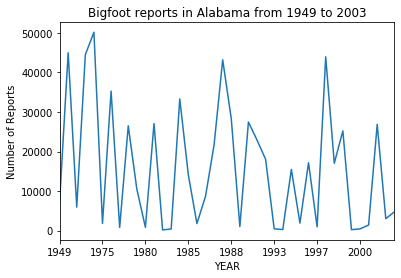

In [152]:
plt.ylabel('Number of Reports')                           # generate the line plot(x=years, y=REPORT_NUMBER)
plt.title('Bigfoot reports in Alabama from 1949 to 2003')
df_bf_alabama[:40].REPORT_NUMBER.plot(kind='line')    # REPORT_NUMBER from 1949 to 2003 in Alabama

In [11]:
df_bf_state = df_bf.groupby("STATE").count()     # gorup by states and count the times that bigfoot showed up in the same state
df_bf_state.head()

,YEAR,SEASON,REPORT_NUMBER
STATE,,,
Alabama,91,91,91
Alaska,20,20,20
Arizona,84,84,84
Arkansas,95,95,95
California,402,402,402


In [12]:
df_bf_state.sort_values("REPORT_NUMBER", ascending = False, inplace = True)
df_bf_state.head()

,YEAR,SEASON,REPORT_NUMBER
STATE,,,
Washington,563,563,563
California,402,402,402
Florida,292,292,292
Ohio,276,276,276
Oregon,241,241,241


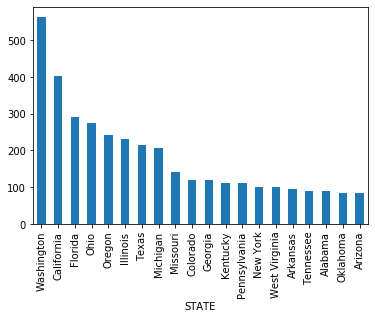

In [13]:
df_bf_state[:20].REPORT_NUMBER.plot(kind='bar')    
# Generate a bar chart
# Top 20 states sighting bigfoot